In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [5]:
train = pd.read_csv("/content/drive/MyDrive/CODSOFT/Task3_Dataset/Churn_Modelling.csv")
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
X = train.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = train['Exited']

X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

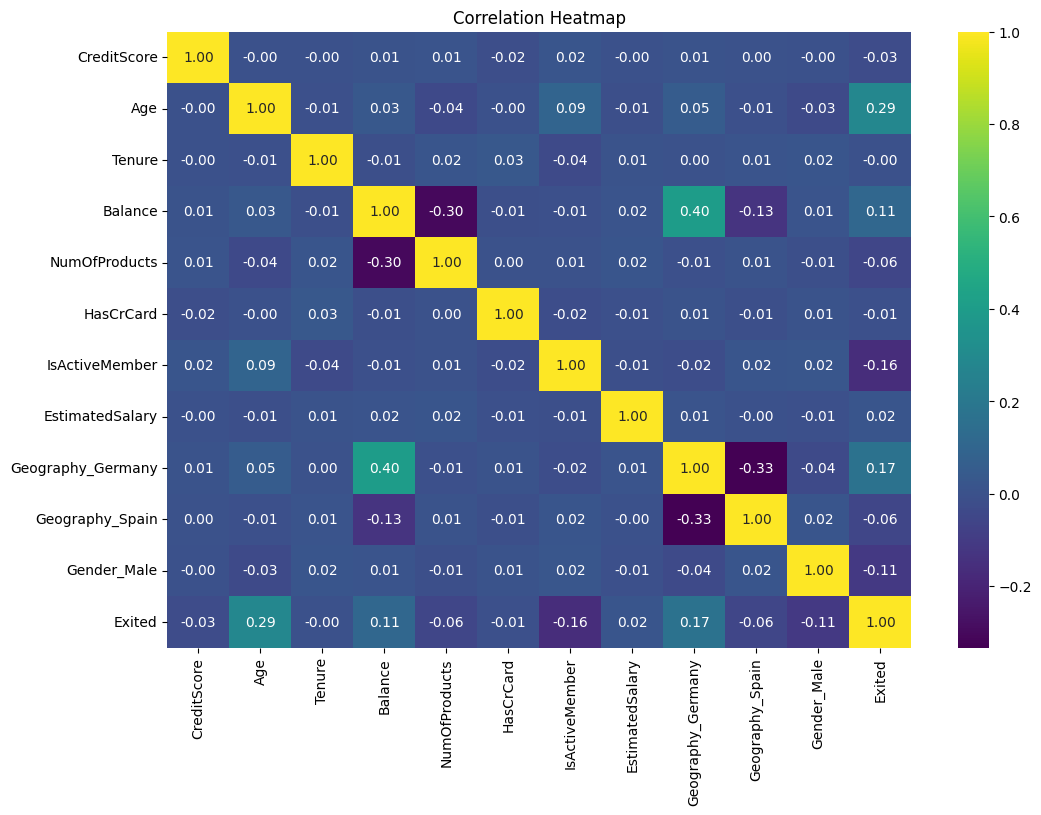

In [11]:
total_data = pd.concat([X_train, y_train], axis=1)
correlation_matrix = total_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
accuracy_list=[]

In [24]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['Decision Tree',accuracy])

Accuracy: 0.7905


In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=1234)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

accuracy_list.append(['Random Forest',accuracy])

Accuracy: 0.8545


In [38]:
#K Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_scaled,y_train)

predictions = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['KNeighbor',accuracy])

Accuracy: 0.835


In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000, verbose=1)

lr.fit(X_train_scaled,y_train)

predictions = lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

accuracy_list.append(['LogRegression',accuracy])

Accuracy: 0.8135


In [40]:
print("Accuracy")
for i in accuracy_list:
  print(i[0],"-->",i[1])

Accuracy
Decision Tree --> 0.7905
Random Forest --> 0.8545
KNeighbor --> 0.835
LogRegression --> 0.8135
